In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare(filepath):
    df = pd.read_csv("Hiv data 2000-2023.csv", encoding='ISO-8859-1', thousands=' ')
    df['Value'] = df['Value'].str.extract(r'(\d[\d,]*)')[0]
    df['Value'] = df['Value'].str.replace(',', '', regex=False).astype(float)
    return df.dropna(subset=['Value'])

def get_top_75_by_region(df):
    top_countries = []
    regions = df['ParentLocationCode'].unique()

    for region in regions:
        df_region = df[(df['ParentLocationCode'] == region) & (df['Period'] == 2023)]
        df_region = df_region.sort_values('Value', ascending=False)
        total = df_region['Value'].sum()
        df_region['Cumulative'] = df_region['Value'].cumsum()
        df_region['CumulativePercent'] = df_region['Cumulative'] / total

        top = df_region[df_region['CumulativePercent'] <= 0.75]
        top['Region'] = region
        top_countries.append(top[['Location', 'Region']])

    top_df = pd.concat(top_countries).drop_duplicates('Location')
    return top_df

def plot_region_trends(df, top_df):
    df_trends = df[df['Location'].isin(top_df['Location'])]
    df_trends = df_trends.merge(top_df, on='Location')

    sns.set(style="whitegrid")
    regions = df_trends['Region'].unique()

    for region in regions:
        df_plot = df_trends[df_trends['Region'] == region]
        plt.figure(figsize=(14, 6))
        sns.lineplot(data=df_plot, x='Period', y='Value', hue='Location', marker='o')
        plt.title(f'HIV Trends (2000–2023) – Top 75% Contributors in {region}')
        plt.ylabel('People Living with HIV')
        plt.xlabel('Year')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_11184\3908261471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['Region'] = region
C:\Users\pc\AppData\Local\Temp\ipykernel_11184\3908261471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['Region'] = region
C:\Users\pc\AppData\Local\Temp\ipykernel_11184\3908261471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

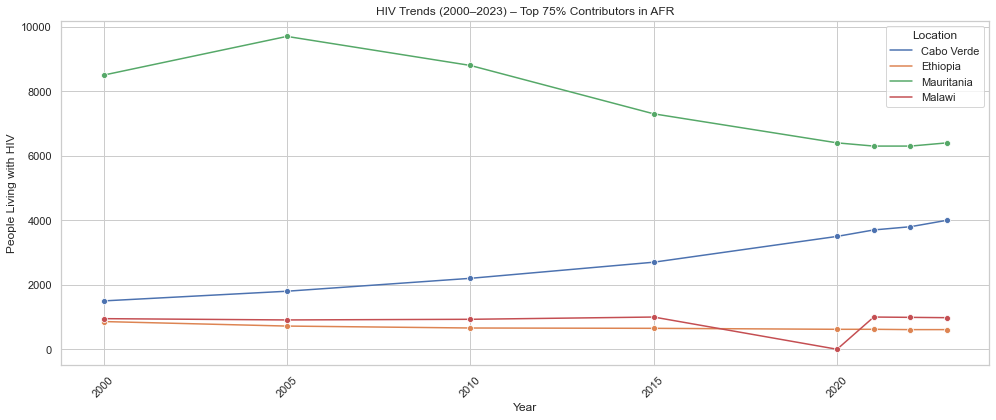

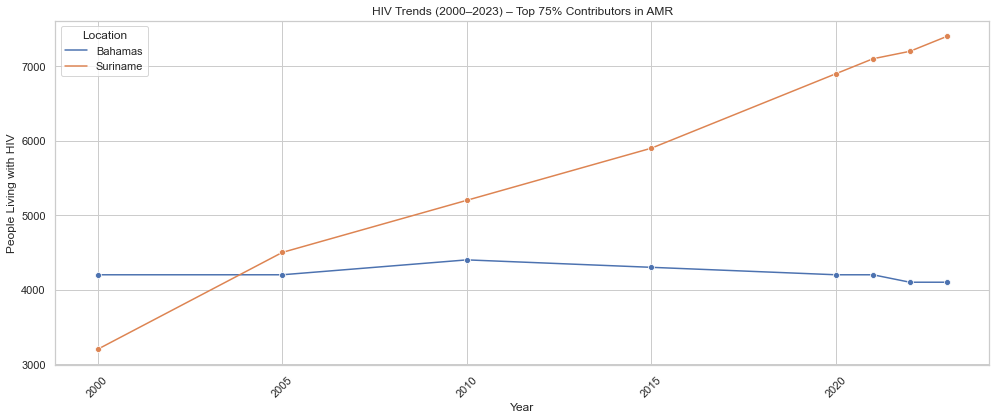

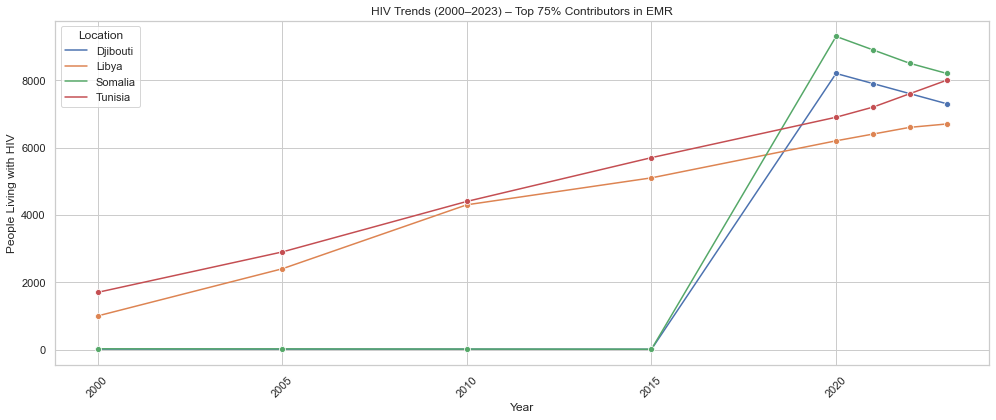

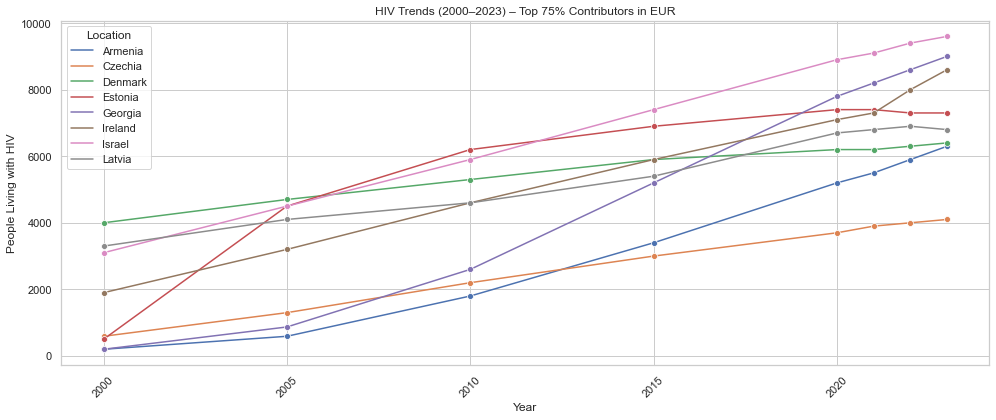

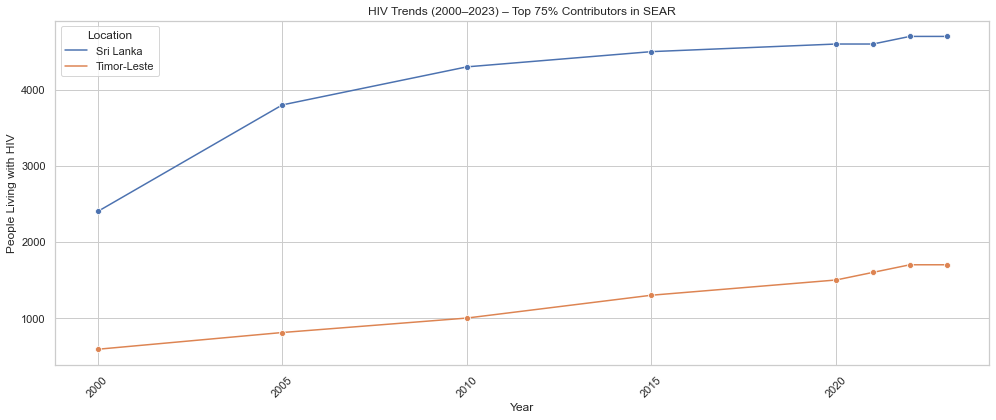

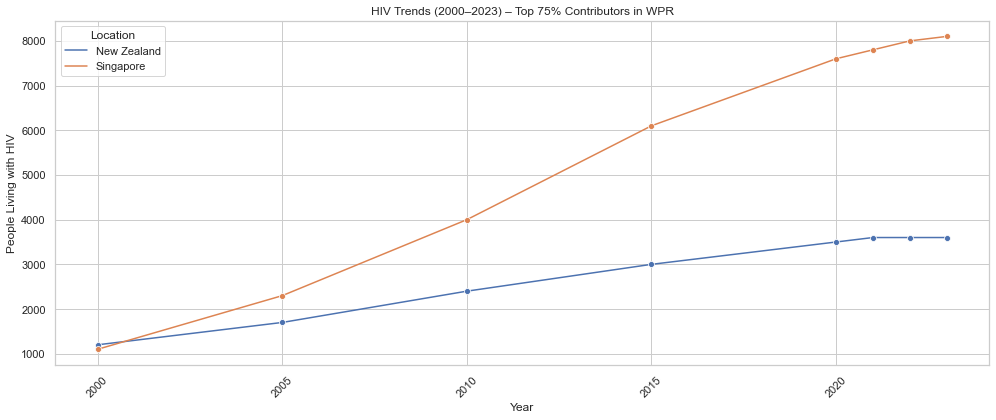

In [4]:
df = load_and_prepare("Hiv data 2000-2023.csv")
top_countries_df = get_top_75_by_region(df)
plot_region_trends(df, top_countries_df)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158 entries, 0 to 1535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IndicatorCode        1158 non-null   object 
 1   Indicator            1158 non-null   object 
 2   ValueType            1158 non-null   object 
 3   ParentLocationCode   1158 non-null   object 
 4   ParentLocation       1158 non-null   object 
 5   Location type        1158 non-null   object 
 6   SpatialDimValueCode  1158 non-null   object 
 7   Location             1158 non-null   object 
 8   Period type          1158 non-null   object 
 9   Period               1158 non-null   int64  
 10  Value                1158 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 108.6+ KB


In [6]:
df.isna().sum()

IndicatorCode          0
Indicator              0
ValueType              0
ParentLocationCode     0
ParentLocation         0
Location type          0
SpatialDimValueCode    0
Location               0
Period type            0
Period                 0
Value                  0
dtype: int64

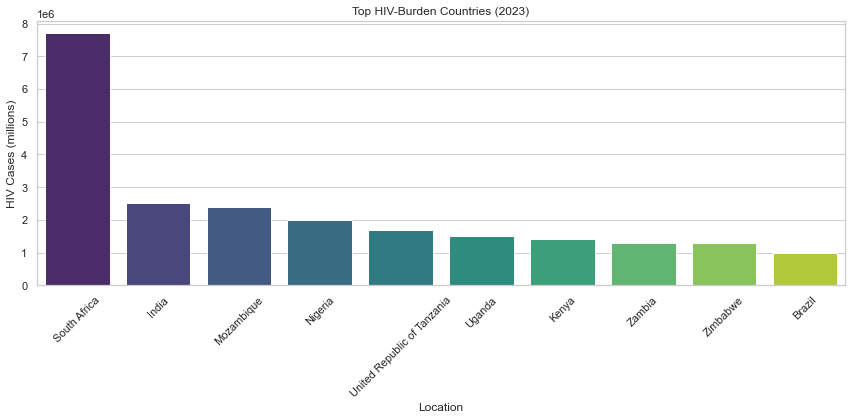

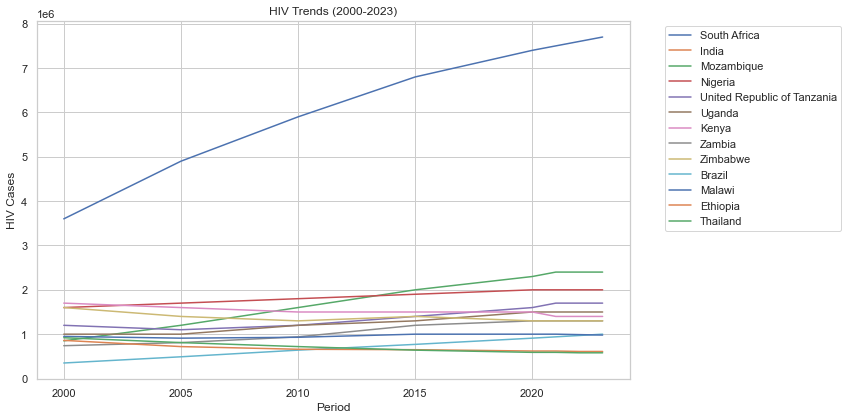

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Hiv data 2000-2023.csv", encoding='ISO-8859-1', thousands=' ')

# Filter for 2023 data, remove "No data" and ranges (e.g., "320 000 [280 000 - 380 000]")
df_2023 = df[df['Period'] == 2023].copy()
df_2023['Value'] = df_2023['Value'].str.extract(r'(\d[\d\s]+)')[0].str.replace(' ', '').astype(float)

# Calculate global total and sort countries
global_total = df_2023['Value'].sum()
df_sorted = df_2023.sort_values('Value', ascending=False).reset_index(drop=True)
df_sorted['Cumulative %'] = (df_sorted['Value'].cumsum() / global_total * 100)

# Select top countries reaching ~75%
top_countries = df_sorted[df_sorted['Cumulative %'] <= 75]['Location'].tolist()

# Plot 1: Top countries bar chart (2023)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted.head(10), x='Location', y='Value', palette='viridis')
plt.title('Top HIV-Burden Countries (2023)')
plt.xticks(rotation=45)
plt.ylabel('HIV Cases (millions)')
plt.tight_layout()
plt.show()

# Plot 2: Trend lines (2000-2023) for top countries
df_trends = df[df['Location'].isin(top_countries)].copy()
df_trends['Value'] = df_trends['Value'].str.extract(r'(\d[\d\s]+)')[0].str.replace(' ', '').astype(float)

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = df_trends[df_trends['Location'] == country]
    sns.lineplot(data=country_data, x='Period', y='Value', label=country)
plt.title('HIV Trends (2000-2023)')
plt.ylabel('HIV Cases')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [9]:
df["Value"].unique()

array([3.2e+02, 3.0e+02, 2.5e+02, 1.9e+02, 1.4e+02, 8.1e+01, 8.2e+01,
       8.5e+01, 9.4e+01, 1.0e+02, 1.2e+02, 6.8e+01, 6.9e+01, 7.1e+01,
       6.6e+01, 6.3e+01, 9.5e+01, 9.7e+01, 9.9e+01, 1.1e+02, 1.3e+02,
       1.5e+02, 3.6e+02, 3.5e+02, 2.7e+02, 4.2e+02, 4.3e+02, 4.4e+02,
       4.6e+02, 5.2e+02, 6.1e+02, 7.2e+02, 5.1e+02, 5.0e+02, 4.9e+02,
       5.3e+02, 5.7e+02, 8.6e+01, 2.0e+02, 4.0e+03, 3.8e+03, 3.7e+03,
       3.5e+03, 2.7e+03, 2.2e+03, 1.8e+03, 1.5e+03, 2.6e+01, 2.4e+01,
       2.2e+01, 2.1e+01, 1.5e+01, 1.0e+01, 5.7e+03, 2.4e+03, 1.3e+01,
       1.4e+01, 1.7e+01, 2.5e+01, 2.7e+01, 6.2e+02, 6.5e+02, 6.6e+02,
       8.6e+02, 5.1e+01, 5.2e+01, 4.7e+01, 4.1e+01, 3.4e+01, 3.3e+02,
       3.1e+02, 2.8e+02, 9.0e+01, 7.3e+01, 2.3e+01, 1.9e+01, 3.5e+01,
       3.7e+01, 1.0e+00, 3.8e+01, 4.3e+01, 2.2e+02, 7.6e+01, 6.2e+01,
       5.7e+01, 3.6e+01, 1.1e+01, 2.0e+00, 8.5e+02, 6.4e+03, 6.3e+03,
       7.3e+03, 8.8e+03, 9.7e+03, 8.5e+03, 1.2e+01, 9.6e+03, 7.8e+03,
       9.8e+02, 9.9e